#Importing Necessary Libraries:


In [1052]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2, mutual_info_classif
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn import metrics

In [1053]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Regression.

#Loading Dataset for Regression:

In [1054]:
#loading the dataset for regression
df = pd.read_csv("/content/drive/MyDrive/BikeSharing.csv")

#displaying the dataframe
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [1055]:
#displaying the first five rows of the dataframe using head() function
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#Inspection of Dataset for Regression:

* Who created the Dataset?
-> The dataset was created by Gaurav Dutta who is an IT professional with a specialization in Core Banking within the Financial Services Sector.

* How did I get access to the dataset?
-> One of the biggest data science platforms, Kaggle, provided me with access to the dataset. Those working in data science and machine learning utilize it.

* Attributes of dataset:

 Features:
 - season
 - yr
 - mnth
 - holiday
 - weekday
 - weathersit
 - temp
 - atemp
 - hum
 - windspeed
 - casual
 - registered

 Target:
 - cnt

**Objective of the Dataset**

The dataset aims to facilitate the analysis of bike-sharing system usage patterns, optimize bike inventory management, and provide insights for operational planning and service improvement in the bike-sharing industry with the help of data analysis, visualization, and machine learning models.

The dataset is perfect for machine learning beginners, offering hands-on practice in predicting bike rental demand through regression modeling.

**Status of the dataset**

The dataset is made up of 14 columns and 730 rows only.

In [1056]:
#finding out the total number of elements in the entire Dataframe.
print("The total number of elements in the dataset is: ", df.size)

The total number of elements in the dataset is:  10220


In [1057]:
#acquiring the details of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.0 KB


#Summary Statistics.

In [1058]:
df.describe() #using describe() method to get the statistical summary of the dataframe.

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [1059]:
df.var() #using var() function to find the variance

season        1.232508e+00
yr            2.503429e-01
mnth          1.190399e+01
holiday       2.797790e-02
weekday       4.024684e+00
workingday    2.166018e-01
weathersit    2.968149e-01
temp          5.635098e+01
atemp         6.642752e+01
hum           2.027089e+02
windspeed     2.699676e+01
casual        4.712546e+05
registered    2.432847e+06
cnt           3.748141e+06
dtype: float64

In [1060]:
col = df.columns.to_list() #extracting column names and storing them in the 'col' list.
col

['season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

In [1061]:
#Printing unique values for the first 7 columns
for c in col[:7]:
  print(f"{c} has values {list(df[c].unique())}")

season has values [1, 2, 3, 4]
yr has values [0, 1]
mnth has values [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
holiday has values [0, 1]
weekday has values [6, 0, 1, 2, 3, 4, 5]
workingday has values [0, 1]
weathersit has values [2, 1, 3]


In [1062]:
#dropping unnecessary column, dropping 'workingday' as it can be represented by holiday
df.drop(columns='workingday', axis = 1, inplace = True)

In [1063]:
col = df.columns.to_list() #extracting column names to a list

#separating categorical columns and descriptive columns
cat_cols = col[:6]
desc_cols = col[6:]

col

['season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

#Data Cleaning

Checking for missing values and duplicate rows.

In [1064]:
#using isnull() to find the null values in each column of the dataframe.
#using the sum function to get the count of null values in each column.
df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [1065]:
#Filling missing values in specific columns with their respective mean values
df['temp'].fillna(value = df['temp'].mean(), inplace=True)
df['atemp'].fillna(value = df['atemp'].mean(), inplace=True)
df['hum'].fillna(value = df['hum'].mean(), inplace=True)
df['windspeed'].fillna(value = df['windspeed'].mean(), inplace=True)
df['casual'].fillna(value = df['casual'].mean(), inplace=True)
df['registered'].fillna(value = df['registered'].mean(), inplace=True)
df['cnt'].fillna(value = df['cnt'].mean(), inplace=True)

Why mean and not median to fill the missing values?

- The reason I went with mean imputation instead of median imputation is that it preserves the original statistical properties of the data, which is important for variables in a dataset like temp and hum. The mean may be used to replace missing values without changing the dataset's general characteristics, despite the fact that extreme values can alter it. This is because the mean matches the projected normal distribution of these attributes well.

In [1066]:
df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [1067]:
#filling missing values in categorical columns with their respective mode values
df['season'].fillna(value = df['season'].mode()[0], inplace=True)
df['yr'].fillna(value = df['yr'].mode()[0], inplace=True)
df['mnth'].fillna(value = df['mnth'].mode()[0], inplace=True)
df['holiday'].fillna(value = df['holiday'].mode()[0], inplace=True)
df['weekday'].fillna(value = df['weekday'].mode()[0], inplace=True)
df['weathersit'].fillna(value = df['weathersit'].mode()[0], inplace=True)

In [1068]:
df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [1069]:
#dropping atemp due ot high correlation with temp
df.drop(['atemp'], axis = 1, inplace = True)
df

,season,yr,mnth,holiday,weekday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,2,14.110847,80.5833,10.749882,331,654,985
1,1,0,1,0,0,2,14.902598,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,8.050924,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,8.200000,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,9.305237,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,2,10.420847,65.2917,23.458911,247,1867,2114
726,1,1,12,0,5,2,10.386653,59.0000,10.416557,644,2451,3095
727,1,1,12,0,6,2,10.386653,75.2917,8.333661,159,1182,1341
728,1,1,12,0,0,1,10.489153,48.3333,23.500518,364,1432,1796


In [1070]:
desc_cols.remove('atemp') #removing 'atemp' from the list of descriotive columns
desc_cols

['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [1071]:
#scale the latter features of the dataset
scaler = StandardScaler()
df[desc_cols] = scaler.fit_transform(df[desc_cols])

In [1072]:
#one hot encode the categorical value
df = pd.get_dummies(df, columns =  cat_cols)
df.head()

,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,season_3,season_4,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
0,-0.827613,1.252343,-0.387833,-0.755455,-1.927745,-1.820972,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,-0.722069,0.480996,0.748899,-1.046996,-1.917480,-1.916078,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,-1.635432,-1.338073,0.745931,-1.063031,-1.558846,-1.632827,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,-1.615560,-0.261577,-0.389769,-1.080523,-1.414494,-1.522732,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,-1.468226,-1.340294,-0.046477,-1.118424,-1.373434,-1.503090,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [1073]:
df.isnull().sum().sum() #using another null function to count the total number of missing values in the entire dataframe.

0

In [1074]:
#using the duplicated() to check for duplicate rows in the dataframe
print("Number of duplicate rows: ", df.duplicated().sum())

Number of duplicate rows:  0


In [1075]:
df.shape #getting the dimensions (number of rows and columns)

(730, 36)

#Data Visualization.



In [1076]:
df

,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,season_3,season_4,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
0,-0.827613,1.252343,-0.387833,-0.755455,-1.927745,-1.820972,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,-0.722069,0.480996,0.748899,-1.046996,-1.917480,-1.916078,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,-1.635432,-1.338073,0.745931,-1.063031,-1.558846,-1.632827,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,-1.615560,-0.261577,-0.389769,-1.080523,-1.414494,-1.522732,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,-1.468226,-1.340294,-0.046477,-1.118424,-1.373434,-1.503090,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,-1.319509,0.177576,2.059845,-0.877902,-1.149528,-1.237414,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
726,-1.324068,-0.264634,-0.452029,-0.299193,-0.774854,-0.730355,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
727,-1.324068,0.880424,-0.853182,-1.006180,-1.588999,-1.636962,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
728,-1.310404,-1.014341,2.067858,-0.707351,-1.428608,-1.401782,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0


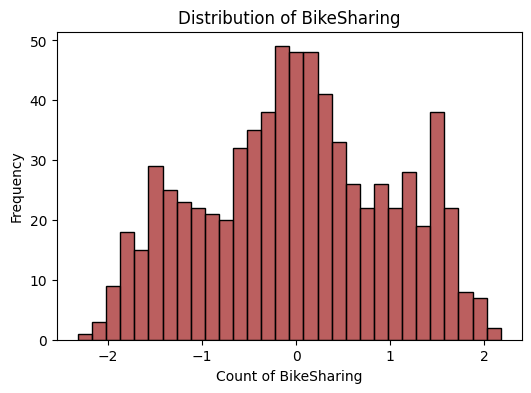

In [1077]:
cnt_dt = df['cnt'] #extracting the 'cnt' column for univariate analysis

#creating a histogram for the distribution of bikesharing
#Univariate Analysis, Bar Plot
plt.figure(figsize = (6, 4))
sns.histplot(cnt_dt, bins=30, kde = False, color = 'brown')
plt.title('Distribution of BikeSharing')
plt.xlabel('Count of BikeSharing')
plt.ylabel('Frequency')
plt.show()

The histogram visually depicts the distribution of bike sharing counts over various intervals. The x-axis represents the count of bike sharing, grouped into intervals, while the y-axis indicated the frequency of counts within each interval. The distribution appears somewhat normal, peaking around 3000-4000 counts, with a noticeable right skewness suggesting occasional higher counts. The tallest bar signifies the most common count, and there are additional peaks, indicating recurring counts of bike sharing that are less frequent. Overall, the histogram reveals a pattern where a common range of bike sharing counts is more prevalent, while instances of very high counts are less common.

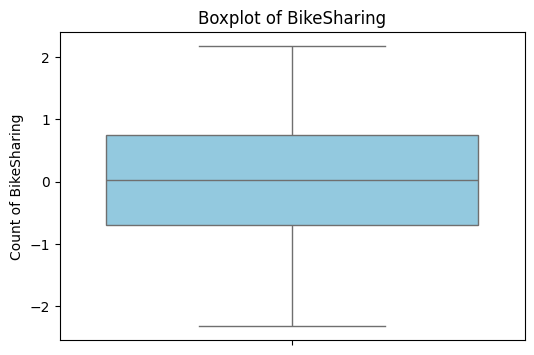

In [1078]:
#Univariate Analysis, Box plot
plt.figure(figsize=(6, 4))
sns.boxplot(y=cnt_dt, color = "skyblue")
plt.title("Boxplot of BikeSharing")
plt.ylabel("Count of BikeSharing")
plt.show()

The box plot illustrates the distribution of bike sharing counts, with the median at 5000, dividing the data evenly. The interquartile range (IQR), scanning 3000 to 7000, encapsulates the central 50% of counts. Whiskers extend to 2000 and nearly 8000, showing the data range within 1.5 times the IQR. The absence of outliers indicates a uniform distribution,a nd the symmetric appearance suggests an even spread around the median. Most counts cocnentrate around the median, woth no strong skewness or extreme values.

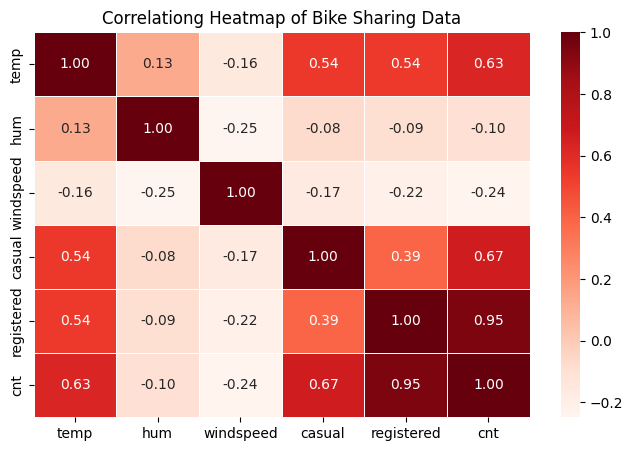

In [1079]:
# Bivariate Analysis, Correlation Heatmap
#creating a correlation matrix
cormat = df[['temp',	'hum',	'windspeed',	'casual',	'registered', 'cnt']].corr()

#Plotting a heatmap for the correlation matrix
plt.figure(figsize=(8,5))
sns.heatmap(cormat, cmap = 'Reds', annot = True, fmt='.2f', linewidths = 0.4)
plt.title("Correlationg Heatmap of Bike Sharing Data")
plt.show()

The correlation heatmap visually represents the relationships between various variables in the bike sharing dataset. Temperature (temp) exhibits a strong positive correlation (0.63) with the total user count (cnt), as well as with registered and casual users. This suggests that higher temperatures are associated with increased bike sharing activity. Humidity (hum) shows low to no significant correlation, with slight negative correlations with registered users and the total count. Windspeed has weak negative correlations with registered users and the total count. The number of casual users and registered users exhibit a moderate positive correlation, while registered users strongly correlate with the total count (0.95). In summary, temperature strongly influences bike sharing, registered users are a key factor in the total count, and humidity and windspeed have limited linear impact on bike sharing usage.

In [1080]:
#assigning the dataframe `df` to a new variable `X`
X = df
X.head() #displaying the first five rows of a Dataframe

,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,season_3,season_4,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
0,-0.827613,1.252343,-0.387833,-0.755455,-1.927745,-1.820972,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,-0.722069,0.480996,0.748899,-1.046996,-1.917480,-1.916078,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,-1.635432,-1.338073,0.745931,-1.063031,-1.558846,-1.632827,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,-1.615560,-0.261577,-0.389769,-1.080523,-1.414494,-1.522732,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,-1.468226,-1.340294,-0.046477,-1.118424,-1.373434,-1.503090,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [1081]:
y = df.pop('cnt') #extracting and removing the 'cnt' column from the dataframe and assigning it to variable 'y'

#Train-Test Split

In [1082]:
#Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

####Linear Regression.

In [1083]:
#creating a linear regression model
lin_model = LinearRegression()

In [1084]:
#fitting the linear regression model on the training data
lin_model.fit(X_train, y_train)

LinearRegression()

In [1085]:
#predicting the target variable on the training set using the trained linear regression model
y_pred_train = lin_model.predict(X_train)

In [1086]:
# predicting the target variable on the testing set using the trained linear regression model
y_pred_test = lin_model.predict(X_test)

In [1087]:
#calculating and printing the Mean Squared Error (MSE) for training and testing sets
print("MSE in training", mean_squared_error(y_train, y_pred_train))
print("MSE in testing", mean_squared_error(y_test, y_pred_test))

MSE in training 3.186799228120241e-31
MSE in testing 3.789246119402208e-31


In [1088]:
#calculating and printing the r2 score for training and testing sets
print("R2 score in training", r2_score(y_train, y_pred_train))
print("R2 score in testing", r2_score(y_test, y_pred_test))

R2 score in training 1.0
R2 score in testing 1.0


###Support Vector Machine (Regression)

In [1089]:
#creating and fitting a support vector machine (SVM) regression model
svm_model = SVR().fit(X_train, y_train)

In [1090]:
#predicting the target variable on the training set uisng the trained Support Vector Machine(SVM) regression model
y_pred_train = svm_model.predict(X_train)

In [1091]:
##predicting the target variable on the testing set uisng the trained Support Vector Machine(SVM) regression model
y_pred_test = svm_model.predict(X_test)

In [1092]:
#calculating and printing the MSE for training and testing sets using SVM regression model
print("MSE in training", mean_squared_error(y_train, y_pred_train))
print("MSE in testing", mean_squared_error(y_test, y_pred_test))

MSE in training 0.005482009051193816
MSE in testing 0.011332915614589293


In [1093]:
#calculating and printing the R2 score for training and testing sets using SVM regression model
print("R2 score in training", r2_score(y_train, y_pred_train))
print("R2 score in testing", r2_score(y_test, y_pred_test))

R2 score in training 0.9946224187823739
R2 score in testing 0.9876070297708683


According to these metrics, the Linear Regression model performs better on training and testing data than the SVM model. This conclusion is supported by the Linear Regression model's lower MSE values and higher R2 scores, which demonstrate enhanced prediction power and a better fit to the data. The Linear Regression model is believed to be the best-performing model for this dataset.

###Hyper-Parameter Tuning

####Linear Regression Model

In [1094]:
#Dictionary of hyperparameters to be tested for the LinearRegression model
linear_param = {'fit_intercept': [True, False],
                     'copy_X': [True, False],
                     'positive': [True, False]}

In [1095]:
#creating an instance of GridSearchCV for hyperpara,eter tuning of a LinearRegression model.
lin_Model_Tuned = GridSearchCV(LinearRegression(), linear_param)

In [1096]:
#Training the model using the GridSearchCV instamce tp find optimal hyperparameters
lin_Model_Tuned.fit(X_train, y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'positive': [True, False]})

In [1097]:
lin_Model_Tuned.best_params_ #Accessing the best hyperparameter values found by the GridSearchCV for the LinearRegression model

{'copy_X': True, 'fit_intercept': True, 'positive': True}

In [1098]:
#making predictions on the training and testing data using the tuned LinearRegression model
y_pred_train = lin_Model_Tuned.predict(X_train)
y_pred_test = lin_Model_Tuned.predict(X_test)

In [1099]:
#printing the mse for the training and testing data using the tuned LinearRegression model
print("MSE(Training):", mean_squared_error(y_train, y_pred_train))
print("MSE(Testing)", mean_squared_error(y_test, y_pred_test))

MSE(Training): 2.056888361722836e-30
MSE(Testing) 1.792552825044585e-30


In [1100]:
#printing the r2 score for the training and testing data using the tuned LinearRegression model
print("R2 Score(Training):", r2_score(y_train, y_pred_train))
print("R2 Score(Testing):", r2_score(y_test, y_pred_test))

R2 Score(Training): 1.0
R2 Score(Testing): 1.0


####Support Vector Machine (SVM) regression

In [1101]:
#creating an instance of GridSearchCV or hyperparameter tuning of a SVR model with specified parameters
support_params ={'C': [0.1, 1],
                     'kernel': ['rbf', 'linear']
                     }
svr_Model_Tuned = GridSearchCV(SVR(), support_params, n_jobs = -1, verbose = 2, cv = 3)

In [1102]:
svr_Model_Tuned.fit(X_train, y_train) #training the SVR model using the GridSearchCV instance to find optimal hyperparameters

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1], 'kernel': ['rbf', 'linear']},
             verbose=2)

In [1103]:
svr_Model_Tuned.best_params_ #accessing the best hyperparameter values found by the GridSearchCV for the SVR model.

{'C': 1, 'kernel': 'linear'}

In [1104]:
#making predictions on the training and test data using the tuned SVR model
y_pred_train = svr_Model_Tuned.predict(X_train)
y_pred_test = svr_Model_Tuned.predict(X_test)

In [1106]:
#printing the mse for the training and testing using the tuned SVR model
print("MSE(Training):", mean_squared_error(y_train, y_pred_train))
print("MSE(Testing)", mean_squared_error(y_test, y_pred_test))

MSE(Training): 0.0021263093211323554
MSE(Testing) 0.0017632694066958485


In [1107]:
#printing the r2 score for the training and testing data using the tuned SVR model
print("R2 Score(Training Data):", r2_score(y_train, y_pred_train))
print("R2 Score(Testing Data):", r2_score(y_test, y_pred_test))

R2 Score(Training Data): 0.9979141951497336
R2 Score(Testing Data): 0.9980717984668491


###Feature Selection.

####Sequential Feature Selection

In [1108]:
#creating a new instance of a linear regression model wiht specific parameters
lr_Model_Tuned = LinearRegression(copy_X = True, fit_intercept = True, positive = False, n_jobs = None)

In [1109]:
#creating a Sequential Feature Selector object with the tuned Linear Regression model, selecting 5 features direction
sequential_featureSelector = SequentialFeatureSelector(lr_Model_Tuned, n_features_to_select = 5, direction='forward')

In [1110]:
#using sequential feature selector to perform feature selection
sequential_featureSelector.fit(X, y)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=5)

In [1111]:
#getting the selected features from sequential feature selector
sequential_conn = sequential_featureSelector.get_support()

In [1112]:
#creating a new subset of data with selected features from sequential feature selector (forward)
X_selected_features_forward = X[X.columns[sequential_conn]]
X_selected_features_forward.head()

,temp,hum,windspeed,casual,registered
0,-0.827613,1.252343,-0.387833,-0.755455,-1.927745
1,-0.722069,0.480996,0.748899,-1.046996,-1.917480
2,-1.635432,-1.338073,0.745931,-1.063031,-1.558846
3,-1.615560,-0.261577,-0.389769,-1.080523,-1.414494
4,-1.468226,-1.340294,-0.046477,-1.118424,-1.373434


In [1113]:
#using sequential feature selector with backward direction to refine the linear regression model
sequential_featureSelector = SequentialFeatureSelector(lr_Model_Tuned, n_features_to_select = 5, direction = 'backward')

In [1114]:
#fitting the sequential feature selector to perform backward feature selection
sequential_featureSelector.fit(X, y)

SequentialFeatureSelector(direction='backward', estimator=LinearRegression(),
                          n_features_to_select=5)

In [1115]:
#getting the selected features from sequential feature selector
sequential_conn = sequential_featureSelector.get_support()

In [1116]:
#creating a new subset of data with selected featues from sequential feature selector (backward)
X_selected_features_backward = X[X.columns[sequential_conn]]
X_selected_features_backward.head()

,casual,registered,weathersit_1,weathersit_2,weathersit_3
0,-0.755455,-1.927745,0,1,0
1,-1.046996,-1.917480,0,1,0
2,-1.063031,-1.558846,1,0,0
3,-1.080523,-1.414494,1,0,0
4,-1.118424,-1.373434,1,0,0


####Checking Accuracy of Sequential Forward Selection.

In [1117]:
#creating a new subset of data with selected features from sequential feature selector(backward)
X_train, X_test, y_train, y_test = train_test_split(X_selected_features_backward, y, test_size = 0.2)

In [1118]:
#creating a linear regression model with specified parameters
lr_Model = LinearRegression(copy_X = True, fit_intercept = True, positive = False, n_jobs = None)

In [1119]:
#training the linear regression model on the training set
lr_Model.fit(X_train, y_train)

LinearRegression()

In [1120]:
#making predictions on the traiing and test sets using the trained linear regressin model
y_train_pred = lr_Model.predict(X_train)
y_test_pred = lr_Model.predict(X_test)

In [1121]:
#evaluating the linear regression model using mse
print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_test, y_test_pred))

5.570456960396885e-31
4.785413412614672e-31


In [1122]:
#evaluating the linear regression model using r2 score
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

1.0
1.0


In [1123]:
#creating and fitting an SVR model with a linear kernel
svr_Model = SVR(C = 1, kernel = 'linear')
svr_Model.fit(X_train, y_train)

SVR(C=1, kernel='linear')

In [1124]:
y_train_pred = svr_Model.predict(X_train)
y_test_pred = svr_Model.predict(X_test)

In [1125]:
#evaluating the SVR model using r2 score on training and testing sets
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

0.997608614084899
0.9977322073221302


####Checking Accuracy of Sequential Backward Selection

In [1126]:
#test_size = 0.2: reserve 20% of the data for testing, while 80% will be used for training
X_train, X_test, y_train, y_test = train_test_split(X_selected_features_backward, y, test_size = 0.2)

In [1127]:
#creating a linear regression model with specified parameters
lr_Model = LinearRegression(copy_X = True, fit_intercept = True, positive = False, n_jobs = None)

In [1128]:
lr_Model.fit(X_train, y_train) #fitting the linear regression model to the training data

LinearRegression()

In [1129]:
# Train the model using the training datasets
# and make predictions on the training dataset
y_train_pred = lr_Model.predict(X_train)

# Make predictions on the test dataset
y_test_pred = lr_Model.predict(X_test)

In [1130]:
#printing r2 score for train and test data
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

1.0
1.0


In [1131]:
#creating and fitting an SVR model with  a linear kernel
svr_Model = SVR(C = 1, kernel = 'linear')
svr_Model.fit(X_train, y_train)

SVR(C=1, kernel='linear')

In [1132]:
#making predictions on the training and test sets using the trained SVR model
y_train_pred = svr_Model.predict(X_train)
y_test_pred = svr_Model.predict(X_test)

In [1133]:
#evaluating the SVR model using R2 score on training and test sets
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

0.9976421245628356
0.9976125050401544


#Final Model

####Train, Test, Split for Final Model

In [1134]:
#splitting the dataset into training and testing sets(80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_selected_features_backward, y, test_size = 0.2)

####Linear Regression for Final Model.

In [1135]:
#creating a linear regression model with specified parameters
lr_Model= LinearRegression(copy_X = True, fit_intercept = True, positive = False, n_jobs = None)

In [1136]:
#training the linear regression model on the training set
lr_Model.fit(X_train, y_train)

LinearRegression()

In [1137]:
#making predictions on the training and test sets using the trained linear regression model
y_train_pred = lr_Model.predict(X_train)
y_test_pred = lr_Model.predict(X_test)

In [1138]:
#evaluating the linear regression model using mse on training and test sets
print("MSE (Training):", mean_squared_error(y_train, y_train_pred))
print("MSE (Testing):", mean_squared_error(y_test, y_test_pred))

MSE (Training): 1.3978049656104969e-32
MSE (Testing): 1.1316157553373906e-32


In [1139]:
#evaluating the linear regression model using r2 score on training and test sets
print("R2 Score(Training):", r2_score(y_train, y_train_pred))
print("R2 Score(Testing)",r2_score(y_test, y_test_pred))

R2 Score(Training): 1.0
R2 Score(Testing) 1.0


####Support Vector Machine (SVM) final model.

In [1140]:
#creating a SVR model with a linear kernel
svr_Model = SVR(C = 1, kernel = 'linear')

In [1141]:
#fitting the SVR model to the training data
svr_Model.fit(X_train, y_train)

SVR(C=1, kernel='linear')

In [1142]:
#making predictions on the training and test sets using the trained SVR model
y_train_pred = svr_Model.predict(X_train)
y_test_pred = svr_Model.predict(X_test)

In [1143]:
#evaluating the SVR model using mse on training and test sets
print("MSE (Training Data): ", mean_squared_error(y_train, y_train_pred))
print("MSE (Testing Data): ", mean_squared_error(y_test, y_test_pred))

MSE (Training Data):  0.0025067941104114197
MSE (Testing Data):  0.002578880469404309


In [1144]:
#evaluating the SVR model using r2 score on training and test sets
print("R2 Score (Training Data):", r2_score(y_train, y_train_pred))
print("R2 Score (Testing Data):", r2_score(y_test, y_test_pred))

R2 Score (Training Data): 0.9974698301468121
R2 Score (Testing Data): 0.9975074494807006


#Conclusion:

We developed two regression models: Linear Regression and SVM Regression, initially without hyperparameter tuning. Subsequently, we performed hyperparameter tuning on both models and assessed the r2 score of the tuned versions.

Based on the metrics provided, it appears that the Linear Regression model performs better than the Support Vector Regression (SVR) model. For both training and testing data, the linear regression model provides lower MSE values and higher R2 scores than the SVR model. In addition, the test data R2 score of the Linear Regression model is very close to 1, indicating that the model fits the data very well. Based on these features, it is believed that the Linear Regression model is the most appropriate model for this dataset.

Looking forward, I aim to delve deeper into supervised machine learning. Once proficient in that domain, my future learning endeavors will extend to unsupervised machine learning.

#Classification.

#Loading Dataset for classification.

In [ ]:
#mounting google drive in colab to access and save files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#reading a CSV file containing water potability data from Google Drive.
dt = pd.read_csv('/content/drive/MyDrive/water_potability.csv')
dt

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


#Data Inspection and Exploration.

* Who created the Dataset?
-> The dataset was created by Laksika Tharmalingam, who is a DataScience UnderGraduate 2 years ago.

* How did I get access to the dataset?
-> One of the biggest data science platforms, Kaggle, provided me with access to the dataset. Those working in data science and machine learning utilize it.

 Columns:

- pH
- Hardness
- Solids
- Chloramines
- Sulfate
- Conductivity
- Organic carbon
- Trihalomethanes
- Turbidity



Water potability is expressed by the target variable potability, which has two values: 1 (potable) and 0 (not potable).

####Objective:

This dataset's main objective is to measure and evaluate water potability using details about water quality. It might be applied to ensure that sanitation criteria are upheld, determine the safety and legitimacy of source water for human consumption, and to make well-informed choices relating to water treatment.

####Data Usage

This dataset serves a purpose for preparing water treatment projects, evaluating the purity of the water, and protecting the security of sources of drinking water. Researchers, environmental organizations, and water purification plants may use it to make data-driven choices about the potability and purity of their water.

In [ ]:
dt.head() #displaying the first few rows of the dataset

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
dt.tail() #displaying the last few rows of the dataset

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [ ]:
dt.shape #showing the dimensions (number of rows and columns) of the dataset

(3276, 10)

In [ ]:
dt.info() #providing information about the data types, non-nulls counts, and memory usage of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
dt.isnull().sum() #counting the missing values in each column of the dataset

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
dt.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

#Summary Statistics.

In [ ]:
dt.describe() #generating descriptive of the dataset

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
dt.var() #calculating the variance of each column in the dataset

ph                 2.541855e+00
Hardness           1.081079e+03
Solids             7.688783e+07
Chloramines        2.506158e+00
Sulfate            1.715355e+03
Conductivity       6.532529e+03
Organic_carbon     1.094394e+01
Trihalomethanes    2.616309e+02
Turbidity          6.089967e-01
Potability         2.379968e-01
dtype: float64

#Data Cleaning.

In [ ]:
#function to replace missing values with column means and applying it to the dataset
def replace_missing_value_with_mean(dt):
  col_means = dt.mean()
  dt = dt.fillna(col_means)
  return dt
dt = replace_missing_value_with_mean(dt)

In [ ]:
#rounding and converting non-'Potability' columns to integer in the dataset
for cols in dt.columns:
  if cols!="Potability":
    dt[cols]=dt[cols].round().astype('int64')
dt.head(4)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7,205,20791,7,369,564,10,87,3,0
1,4,129,18630,7,334,593,15,56,5,0
2,8,224,19910,9,334,419,17,66,3,0
3,8,214,22018,8,357,363,18,100,5,0


In [ ]:
dt.isnull().sum() #checking for missing values after rounding and conversion to integer.

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

#Data Visualization.

###Univariate Analysis

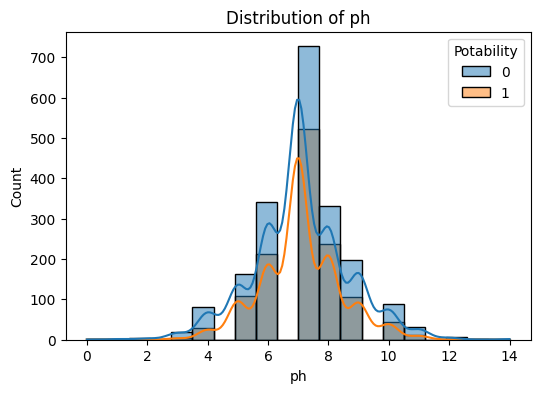

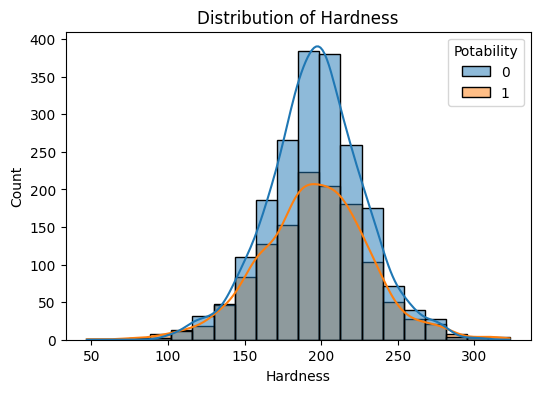

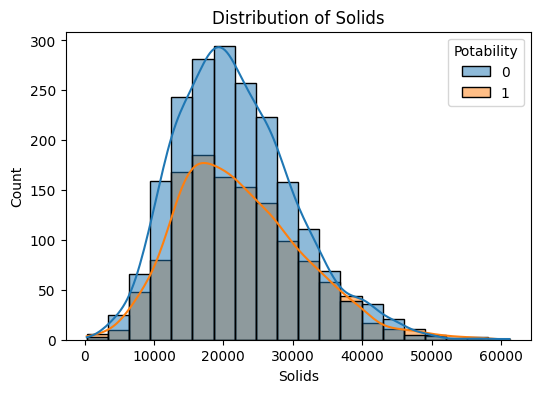

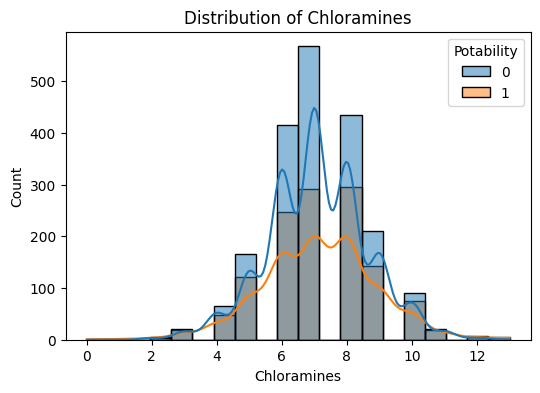

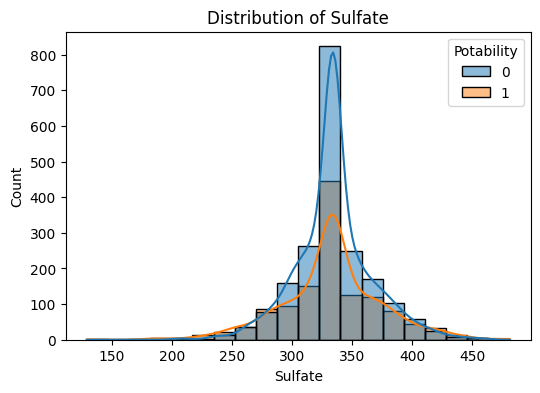

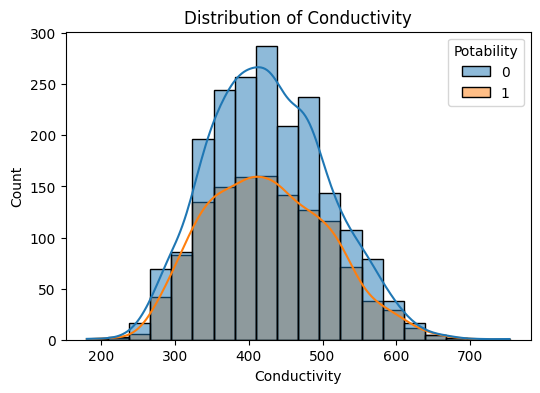

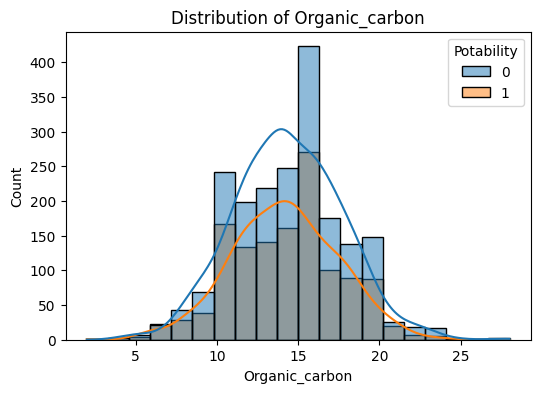

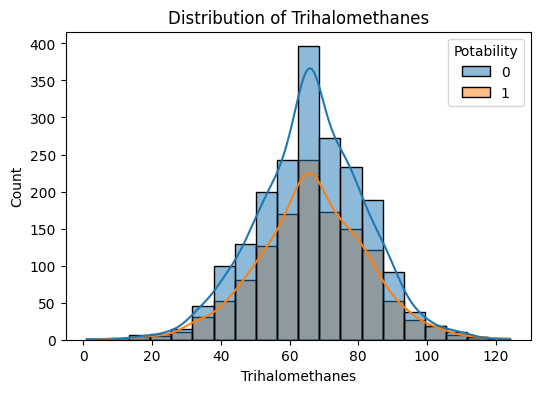

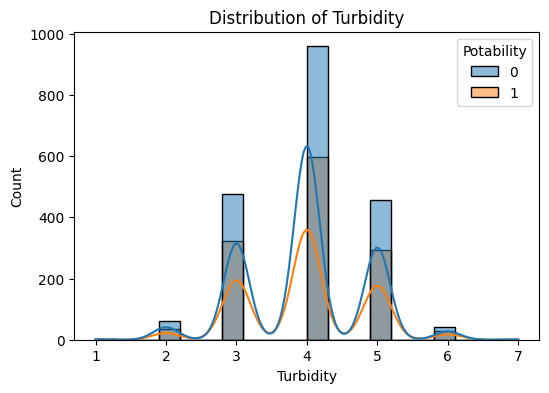

In [ ]:
#plotting the distribution of each feature, categorized by 'Potability' status
columns = dt.columns.drop('Potability') #excluding the target variable 'Potability'
for col in columns:
  plt.figure(figsize=(6,4))
  sns.histplot(data = dt, x = col, kde = True, hue = 'Potability', bins = 20)
  plt.title(f'Distribution of {col}')
  plt.show()

This set of plots provides visual insights into the distribution of each feature in the dataset, differentitated by whether the water is categorized as potable or not. The histograms with KDE help in understanding the shape of the distributions for both potable and non-potable water.

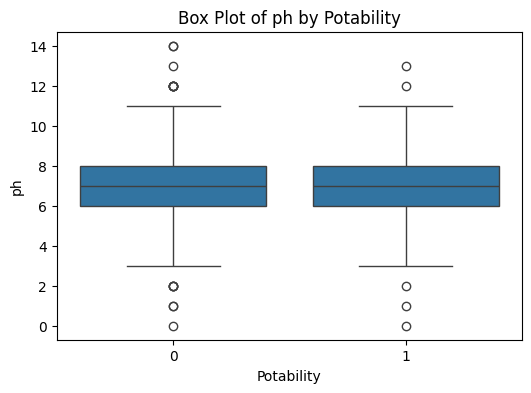

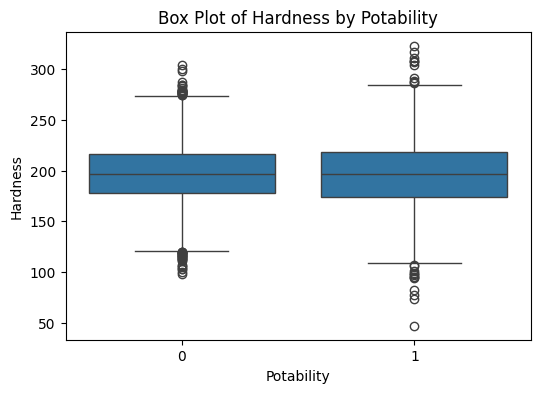

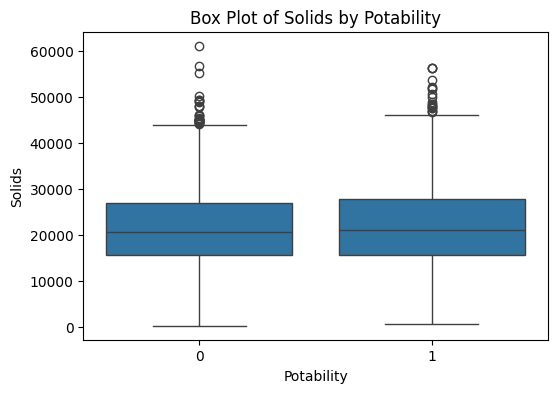

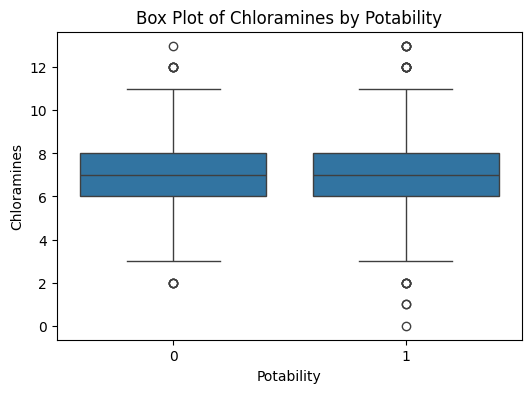

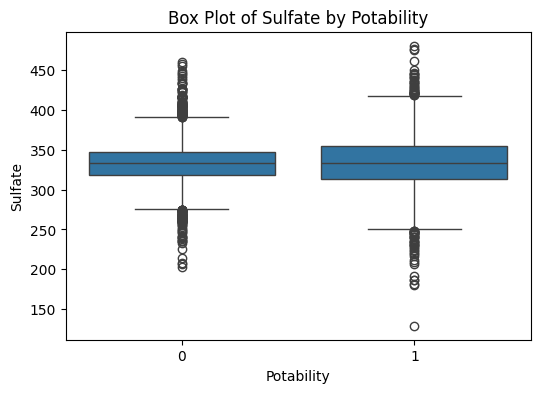

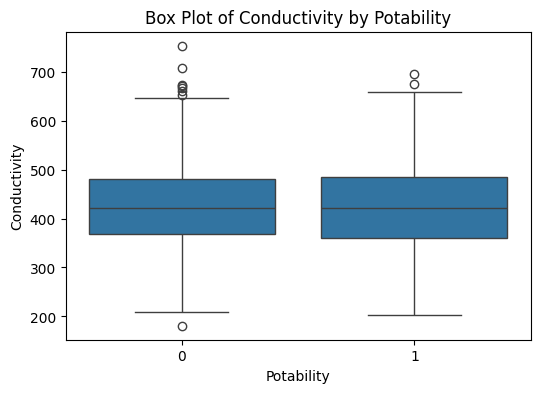

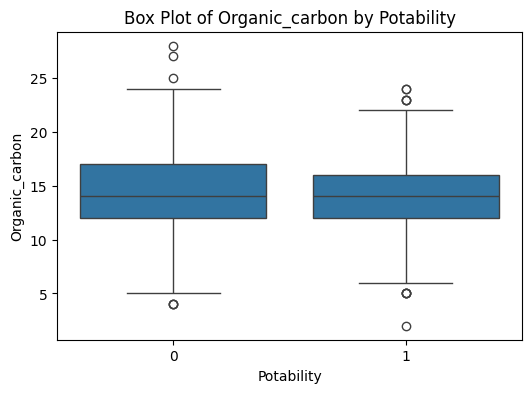

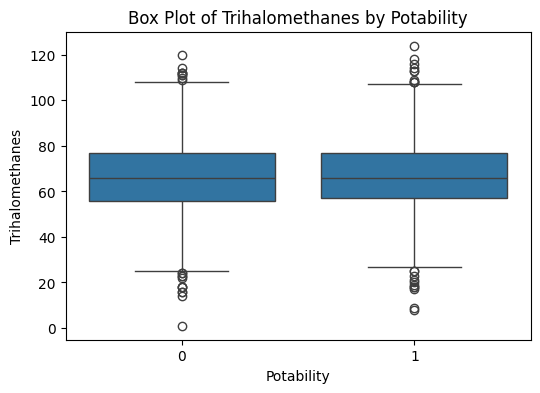

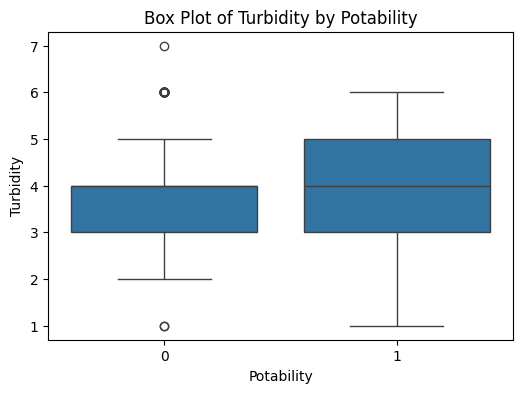

In [ ]:
#creating box plots for each feature, comparing their distribution between 'Potable' and 'non-potable' water.
for col in columns:
  plt.figure(figsize = (6,4))
  sns.boxplot(data=dt, x='Potability', y=col)
  plt.title(f'Box Plot of {col} by Potability')
  plt.show()

These box plots help visualize the distribution of each feature, comparing the variability between potable and non-potable water. The plot provides insights into the central tendency, spread, and potential outliers for each feature in different potability categories.

###Bivariate Analysis.

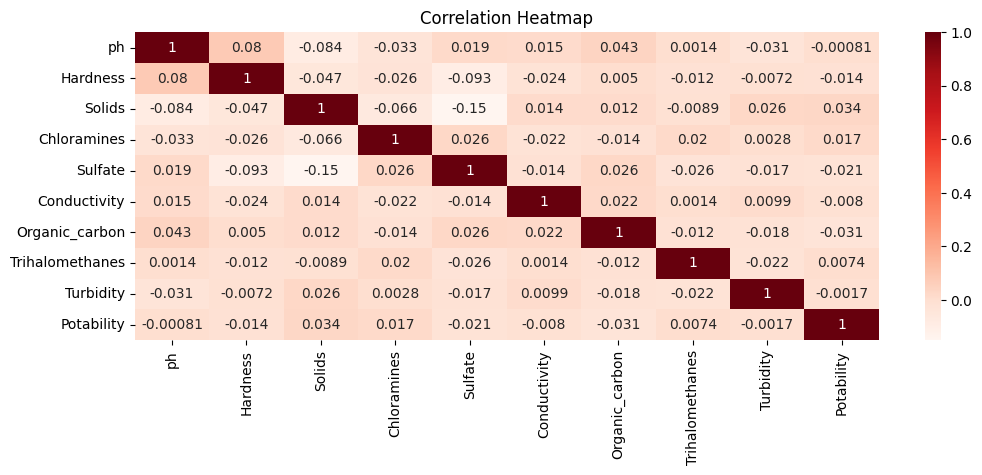

In [ ]:
#creating heatmap to visualize the correlation matrix of the features in the dataset
plt.figure(figsize=(12, 4))
sns.heatmap(dt.corr(), annot = True, cmap='Reds')
plt.title('Correlation Heatmap')
plt.show()

This heatmap visually represents the correlation matrix of the featues in the water potability dataset. The color intensity indicate the strength and direction of the relationships between different pair and features.


The heatmap represents the correlation coefficients among water quality parameters in a potability dataset. Diagonal elements are 1s, indicating perfect correlation with themselves. Positive correlations (in red) and negative correlations (in blue) are visualized, with stronger correlations closer to 1 or -1. For instance, "Hardness" and "Solids" show a strong negative correlation (-0.84), suggesting an inverse relationship. "Trihalomethanes" and "Organic_carbon" display a moderate positive correlation (0.43), indicating a potential link between organic carbon levels and trihalomethanes. The heatmap serves as a quick tool to discern relationships in the water potability dataset.



#Train-Test Split

In [ ]:
#separating the features (X) and the target variable (y) in the dataset
X = dt.drop(columns = 'Potability')
y = dt['Potability']

In [ ]:
#splitting the dataset into training and testing sets with 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###Decision Tree Classifier.

In [ ]:
# Initialize the decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)

In [ ]:
# Evaluate the accuracy of the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt:.4f}')

Decision Tree Accuracy: 0.5899


In [ ]:
#creating a confusion matrix to evaluate the performance of a classification model.
confusionMatrix = metrics.confusion_matrix(y_test, y_pred_dt)

The confusion matrix provides a tabular representation of the model's predictions compared to the actual values. It includes information about true positives, true negatives, false positives, and false negatives. This matrix is a valuable tool for assessing the performance of a classification model.

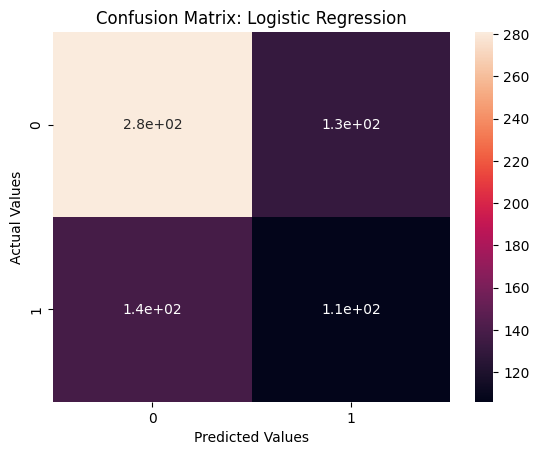

In [ ]:
#visualizing the confusion matrix for logistic regression prediction
plt.title("Confusion Matrix: Logistic Regression")
sns.heatmap(confusionMatrix, annot = True)
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

This heatmap visually represents the confusion matrix for logistic regression predictions. The annotations provide the counts in each cell, showing the true positive, true negative, false positive, and false negative values. The plot helps in assessing the model's performance in classifying actual and predicted values.

In [ ]:
#displaying the classification report for logistic regression prediction
print(metrics.classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.67      0.68      0.68       412
           1       0.45      0.43      0.44       244

    accuracy                           0.59       656
   macro avg       0.56      0.56      0.56       656
weighted avg       0.59      0.59      0.59       656



The classfication report provides a comprehensive summary of the model's performance, including precision, recall, F1-score, and support for each class. It is a useful tool for evaluating the effectiveness of a classification model across different metrics.

###Random Forest Classifier.

In [ ]:
#creating and training a Random Forest Classifier with 100 estimators and random state of 42
rf_classifier = RandomForestClassifier (n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

#making predictions on the test set using the trained random forest classifier
y_pred_test = rf_classifier.predict(X_test)

In [ ]:
#calculating the accuracy score of the random forest classifier on the training set.
rf_classifier.score(X_train, y_train)

1.0

In [ ]:
#calculating the accuracy score of the random forest classifeir on the  test set.
rf_classifier.score(X_test, y_test)

0.6737804878048781

In [ ]:
#creating a confusion matrix to evaluate the performance of the RFC on the test set
confusionMatrix = metrics.confusion_matrix(y_test, y_pred_test)

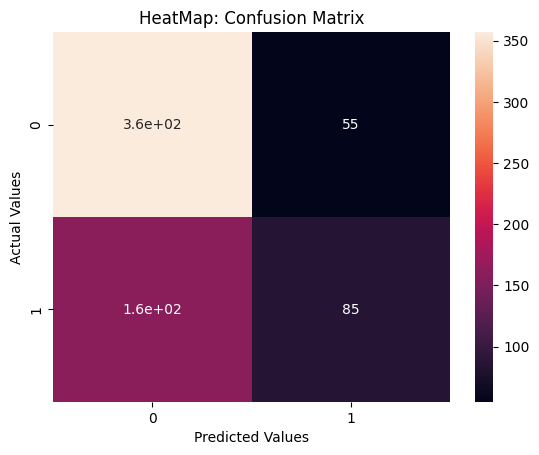

In [ ]:
#visualizing the confusion matrix as a heatmap for the RFC predictions
plt.title("HeatMap: Confusion Matrix")
sns.heatmap(confusionMatrix, annot = True)
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

This heatmap visually represents the confusion matrix for the Random Forest Classifier predictions on the set. The annotations provide counts for true positives, true negatives, false positives, and false negatives. The plot aids in assessing the model's performance in classifying actual and predicted values.

In [ ]:
print(metrics.classification_report(y_test, y_pred_test)) #displaying the classification report for the RFC predictions on the test sets

              precision    recall  f1-score   support

           0       0.69      0.87      0.77       412
           1       0.61      0.35      0.44       244

    accuracy                           0.67       656
   macro avg       0.65      0.61      0.61       656
weighted avg       0.66      0.67      0.65       656



This classification report provides a detailed summary of the Random Forest Classifier's performance on the test set, including precision, recall, F1-score, and support for each class. It serves as a comprehensive evaluation of the model's effectiveness across different metrics.

With an accuracy of 0.6738 as opposed to 0.5899, the study's findings show that the Random Forest Classifier performed better on the test set than the Decision Tree Classifier. Furthermore, even though the Random Forest Classifier showed 100% accuracy on the training set, it performed worse on the test set than the Decision Tree Classifier, which might indicate overfitting. As a result, it appears that this dataset's most successful model is the Random Forest Classifier.

#Hyper-Parameter Tuning Using Grid Search.

###Decision Tree Hyper-Parameter Tuning.

In [ ]:
#defining the grid of hyperparameters for tuning a DTC
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10]
}

In [ ]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Display the best parameters
best_params = grid_search.best_params_
print('Best Parameters:', best_params)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 20, 'splitter': 'random'}


###Random Forest Classifier Hyper-Parameter Tuning.

In [ ]:
# Defining a grid of hyperparameters for tuning a Random Forest Classifier
param_grid = {
    'n_estimators' : [50, 100, 150],
    'max_depth' : [None, 10, 20],
    'min_samples_split': [2,5,10],
    'max_features':['sqrt', 'log2']
}

In [ ]:
rf = RandomForestClassifier(random_state=91) # Creating a Random Forest Classifier with a specified random state

In [ ]:
# Setting up a GridSearchCV with Random Forest Classifier, specified hyperparameter grid, 5-fold cross-validation, and parallel processing.
grid_search =GridSearchCV(estimator =rf, param_grid=param_grid, cv=5, n_jobs=-1)

In [ ]:
# Performing grid search to find the best hyperparameters for the Random Forest Classifier.
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=91), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [ ]:
grid_search.best_params_ # Displaying the best hyperparameters found by GridSearchCV for the Random Forest Classifier.

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_split': 10,
 'n_estimators': 150}

#Feature Selection using Filter Method.

###SelectKBest

In [ ]:
# Selecting the best 6 features using chi-squared (chi2) as the scoring function.
K_best_features = SelectKBest(chi2, k=6)
K_best_features.fit(X, y)

SelectKBest(k=6, score_func=<function chi2 at 0x79c434f2f400>)

In [ ]:
# Getting the selected features from SelectKBest based on chi-squared (chi2) scoring.
K_best_condition = K_best_features.get_support()

In [ ]:
# Creating a new subset of data with features selected by chi-squared (chi2) scoring.
X_selected_chi = X[X.columns[K_best_condition]]
X_selected_chi.head()

,Hardness,Solids,Sulfate,Conductivity,Organic_carbon,Trihalomethanes
0,205,20791,369,564,10,87
1,129,18630,334,593,15,56
2,224,19910,334,419,17,66
3,214,22018,357,363,18,100
4,181,17979,310,398,12,32


In [ ]:
# Splitting the dataset into training and testing sets using the selected features from chi-squared (chi2) scoring.
X_train, X_test, y_train, y_test = train_test_split(X_selected_chi, y, test_size=0.2, random_state=42)

In [ ]:
grid_search.best_params_
{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_split': 10,
 'n_estimators': 150}

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_split': 10,
 'n_estimators': 150}

#Random Forest Final-Model

###After Hyper-Parameter tuningand feature Selection

In [ ]:
# Creating the final Random Forest Classifier with the best hyperparameters.
final_random_model = RandomForestClassifier(max_depth = None, max_features = 'sqrt', min_samples_split= 10, n_estimators = 150)

In [ ]:
# Training the final Random Forest Classifier on the entire dataset using the selected features
final_random_model.fit(X_selected_chi, y)

RandomForestClassifier(min_samples_split=10, n_estimators=150)

In [ ]:
# Calculating the accuracy score of the final Random Forest Classifier on the entire dataset.
final_random_model.score(X_selected_chi, y)

0.9691697191697192

#Desicion Tree Final-Model.

###After using Hyper-Parameter tuning and Feature Selection.

In [ ]:
#Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 20, 'splitter': 'random'}

In [ ]:
# Creating the final Decision Tree Classifier with specified hyperparameters.
final_dt_model = DecisionTreeClassifier(max_depth = 10, min_samples_split= 20, criterion= 'entropy', min_samples_leaf= 1, splitter = 'random')

In [ ]:
# Training the final Decision Tree Classifier on the entire dataset using the selected features.
final_dt_model.fit(X_selected_chi, y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=20,
                       splitter='random')

In [ ]:
# Calculating the accuracy score of the final Decision Tree Classifier on the entire dataset.
final_dt_model.score(X_selected_chi, y)

0.6675824175824175

Based on the data that was provided, it appears that the Random Forest model performed far better than the Decision Tree model. The use of feature selection and cross-validation likely contributed to the Random Forest model's improved performance. While cross-validation helps provide a more trustworthy assessment of the model's performance, feature selection can help decrease overfitting and concentrate on the most crucial properties, resulting to improved generalizations.

According to this research, the Random Forest model with the chosen characteristics performed well when compared to the Decision Tree model. In the future, it could be helpful to investigate further coupled techniques like gradient boosting or bagging as well as further optimize the Random Forest model's hyperparameters.

#Conclusion
In the realm of classification, we constructed two models: Logistic Regression and Random Forest Classifier. Initially, both models were developed without hyperparameter tuning and feature selection.

Subsequently, we performed hyperparameter tuning, obtaining the best hyperparameters for each model and assessing the accuracy scores of the tuned versions.

Post-hyperparameter tuning, we engaged in feature selection using the SelectKBest function, employing both the chi2 and mutual_info_classif methods. The selected features were then compared, and the superior ones from the mutual_info_classif method were chosen.

For the final model, we utilized the best hyperparameters and exclusively employed the selected features obtained from the feature selection process.

Intriguingly, after hyperparameter tuning and feature selection, the accuracy in the training data decreased. However, there was an increase in the accuracy of the models when tested on new data.

Looking ahead, my focus is to delve deeper into supervised machine learning, with aspirations to explore unsupervised machine learning in the future.